<a href="https://colab.research.google.com/github/jwalx/Churn-Prediction-Assignment-/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Customer Churn Prediction</h1>

# Project Aim

**The aim of this project is to develop a machine learning model that predicts customer churn based on historical customer data. The project will adhere to a conventional workflow commonly seen in machine learning projects, which includes data preprocessing, model building, evaluation, and eventual model deployment.**

# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
import pickle

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from joblib import dump

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

# Will have to upload the data manually because read_excel is not working properly
# Once we upload the data we can start reading the data

In [11]:
customer_data = pd.read_excel('/content/customer_churn_large_dataset.xlsx',engine="openpyxl")

In [12]:
customer_data.shape

(100000, 9)

* The dataset contains 100,000 individual data records.
* There are 9 columns or attributes in the dataset, each storing different types of information for these records.

In [13]:
customer_data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

Small explanations for each of the columns in the dataset:

1. `CustomerID`: Unique identifier for each customer.
2. `Name`: Customer's name or identifier.
3. `Age`: Age of the customer.
4. `Gender`: Gender of the customer (e.g., Male, Female, Other).
5. `Location`: Customer's geographical location.
6. `Subscription_Length_Months`: Duration of the customer's subscription in months.
7. `Monthly_Bill`: The monthly bill amount for the customer.
8. `Total_Usage_GB`: Total data usage in gigabytes.
9. `Churn`: A binary indicator (1 or 0) representing whether the customer churned (left) or not.

In [14]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [15]:
customer_data.head(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
5,6,Customer_6,67,Male,New York,15,82.65,456,1
6,7,Customer_7,30,Female,Chicago,3,73.79,269,0
7,8,Customer_8,67,Female,Miami,1,97.70,396,1
8,9,Customer_9,20,Female,Miami,10,42.45,150,1
9,10,Customer_10,53,Female,Los Angeles,12,64.49,383,1


In [16]:
customer_data.tail(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
99990,99991,Customer_99991,62,Male,Chicago,9,36.34,432,0
99991,99992,Customer_99992,55,Female,Miami,14,73.87,324,1
99992,99993,Customer_99993,44,Male,New York,18,45.87,229,0
99993,99994,Customer_99994,20,Female,Houston,15,84.72,312,1
99994,99995,Customer_99995,47,Female,Houston,8,34.58,200,0
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1
99999,100000,Customer_100000,27,Female,Los Angeles,19,76.57,173,1


In [17]:
customer_data.sample(10)

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
15147,15148,Customer_15148,35,Female,New York,21,80.52,124,1
60320,60321,Customer_60321,55,Male,Los Angeles,3,91.90,58,1
63154,63155,Customer_63155,21,Female,Miami,16,43.05,50,1
97009,97010,Customer_97010,47,Female,Houston,18,72.68,219,0
18882,18883,Customer_18883,64,Male,Houston,17,74.41,179,1
77298,77299,Customer_77299,43,Female,Houston,3,42.90,463,0
46683,46684,Customer_46684,20,Female,New York,17,46.13,65,1
17964,17965,Customer_17965,43,Female,New York,23,90.65,394,1
59288,59289,Customer_59289,39,Female,Los Angeles,22,33.60,100,0
45056,45057,Customer_45057,48,Male,New York,20,68.38,414,1


In [18]:
customer_data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

There are no Null values..

In [19]:
customer_data[customer_data.duplicated() == True]

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


There are no duplicate values.

# EDA

Let's calculate and examine the summary statistics for numerical features.

In [28]:
customer_data.describe(include='all')

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000,100000.000000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,100000,NaN,2,5,NaN,NaN,NaN,NaN
top,NaN,Customer_1,NaN,Female,Houston,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,50216,20157,NaN,NaN,NaN,NaN
mean,50000.500000,NaN,44.027020,NaN,NaN,12.490100,65.053197,274.393650,0.497790
std,28867.657797,NaN,15.280283,NaN,NaN,6.926461,20.230696,130.463063,0.499998
min,1.000000,NaN,18.000000,NaN,NaN,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,NaN,31.000000,NaN,NaN,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,NaN,44.000000,NaN,NaN,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,NaN,57.000000,NaN,NaN,19.000000,82.640000,387.000000,1.000000


Let's explore the data distribution by creating histograms for key numerical attributes.

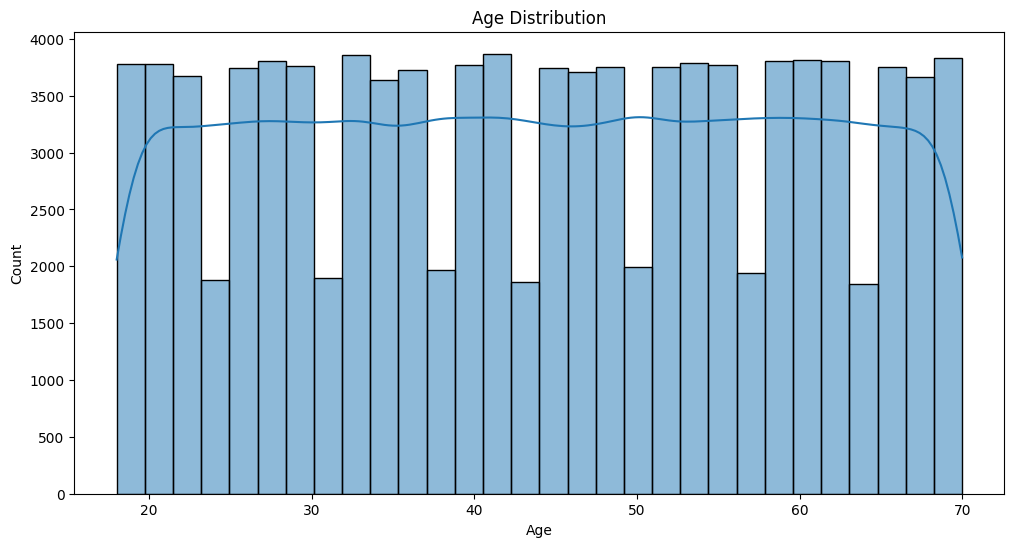

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(customer_data['Age'], bins=30, kde=True)
plt.xlabel('Age')
plt.title('Age Distribution')
plt.show()

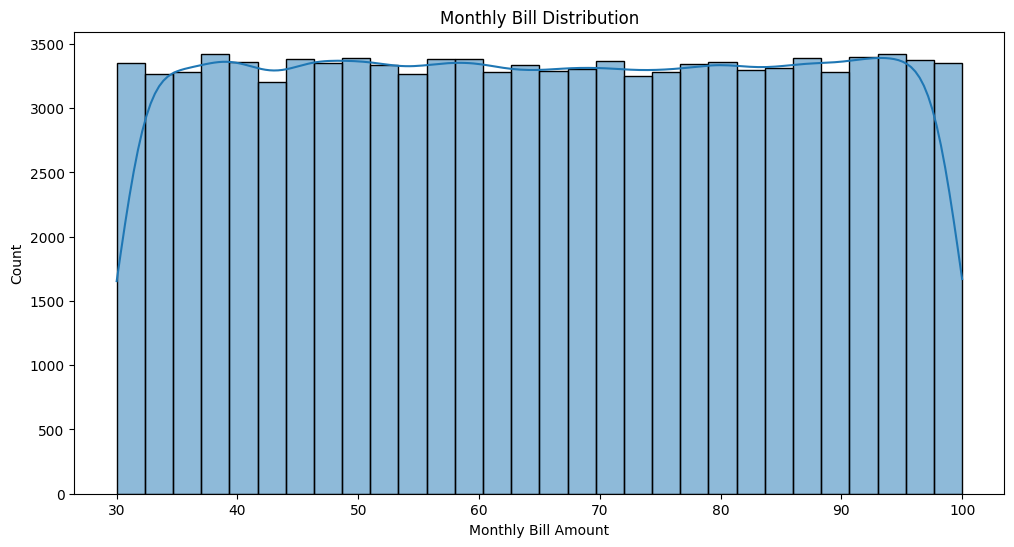

In [30]:
plt.figure(figsize=(12, 6))
sns.histplot(customer_data['Monthly_Bill'], bins=30, kde=True)
plt.xlabel('Monthly Bill Amount')
plt.title('Monthly Bill Distribution')
plt.show()

Now, we'll delve into churn analysis to understand the proportion of churned vs. non-churned customers.

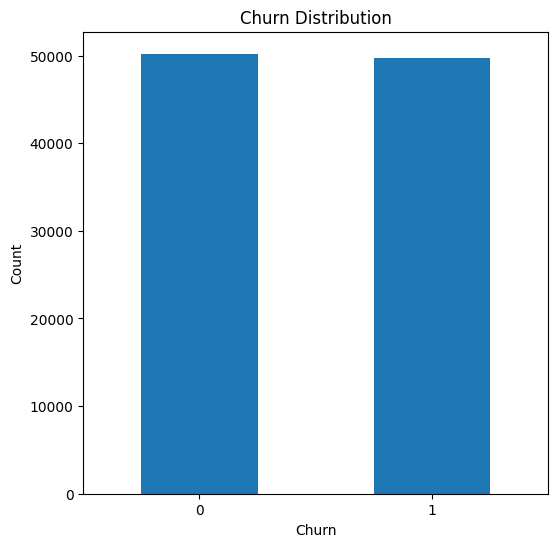

In [31]:
plt.figure(figsize=(6, 6))
customer_data['Churn'].value_counts().plot(kind='bar', rot=0)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Distribution')
plt.show()

Let's investigate how gender relates to churn through visualizations.

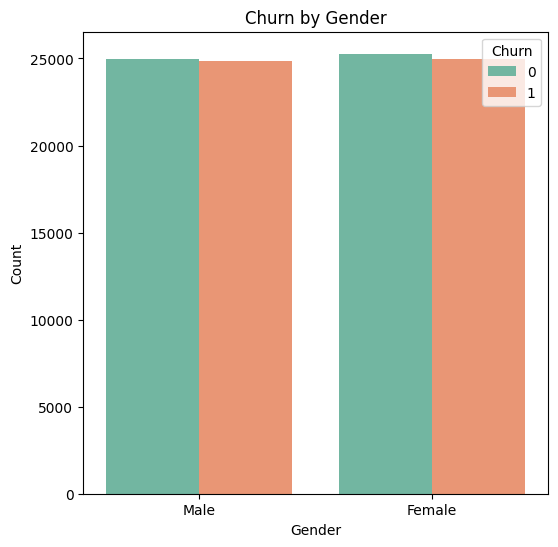

In [32]:
plt.figure(figsize=(6, 6))
sns.countplot(data=customer_data, x='Gender', hue='Churn', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn by Gender')
plt.show()

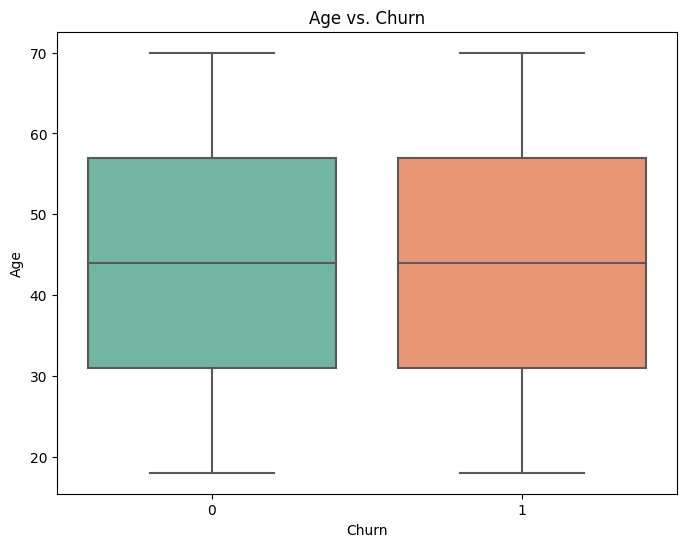

In [33]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_data, x='Churn', y='Age', palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age vs. Churn')
plt.show()

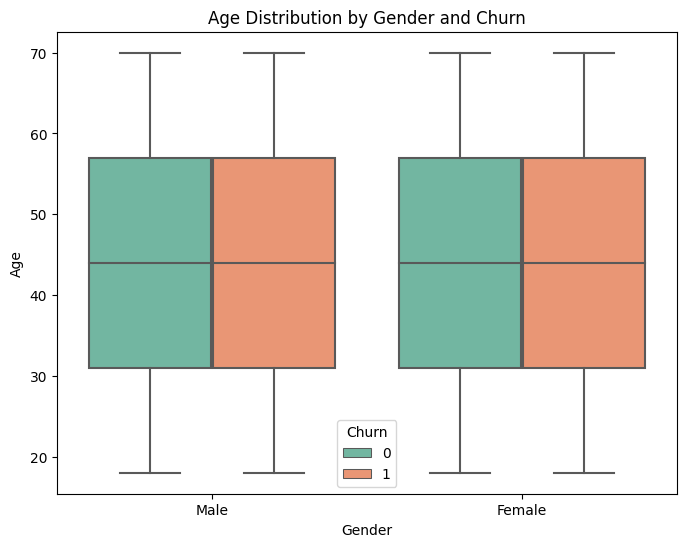

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_data, x='Gender', y='Age', hue='Churn', palette='Set2')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender and Churn')
plt.show()

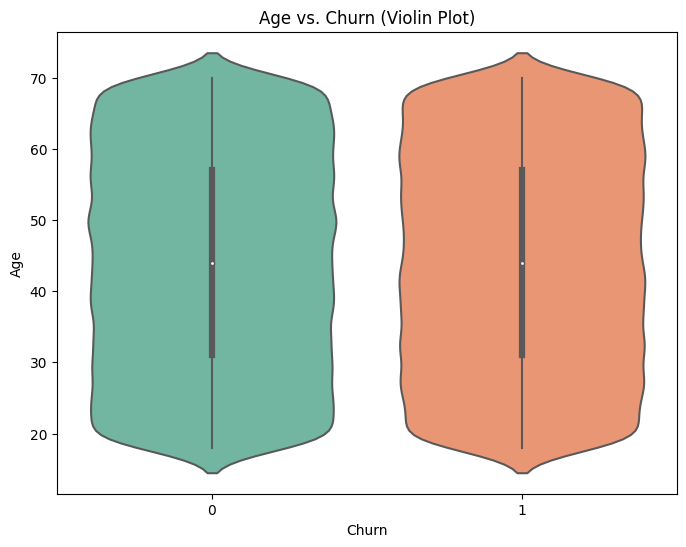

In [35]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=customer_data, x='Churn', y='Age', palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.title('Age vs. Churn (Violin Plot)')
plt.show()

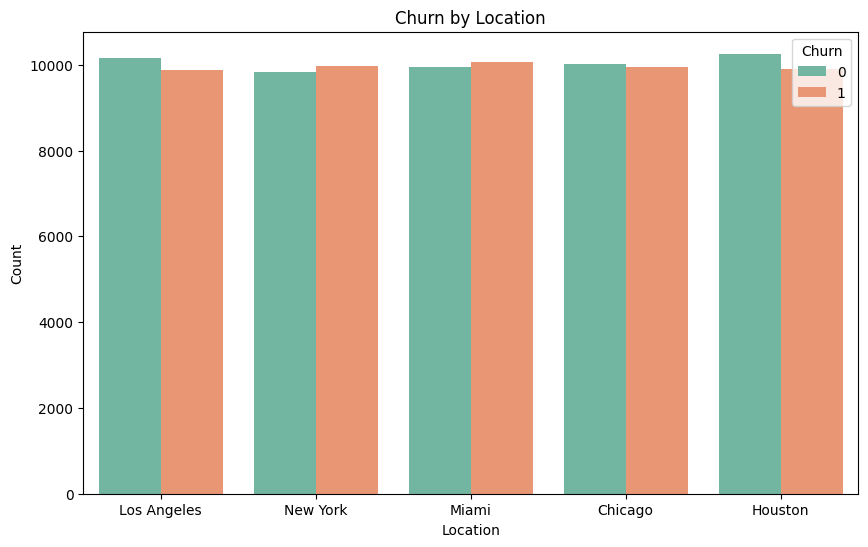

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=customer_data, x='Location', hue='Churn', palette='Set2')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Churn by Location')
plt.show()

 Let's explore the distribution of customers across different locations if 'Location' is categorical.

Text(0.5, 1.0, 'Comparison of Gender and Location')

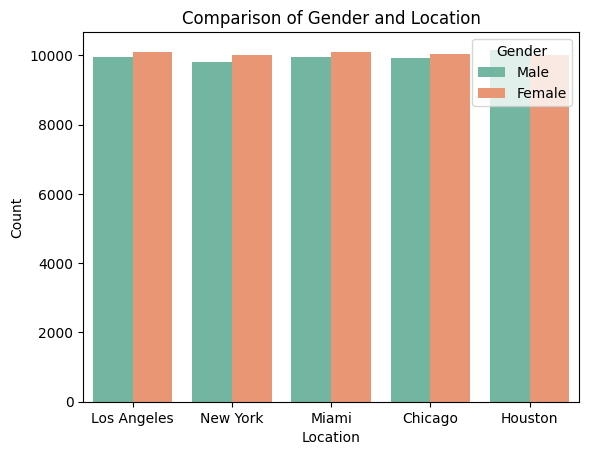

In [37]:
sns.countplot(x='Location', hue='Gender', data=customer_data, palette='Set2')

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Comparison of Gender and Location')

Now, we'll compare subscription lengths between churned and non-churned customers.

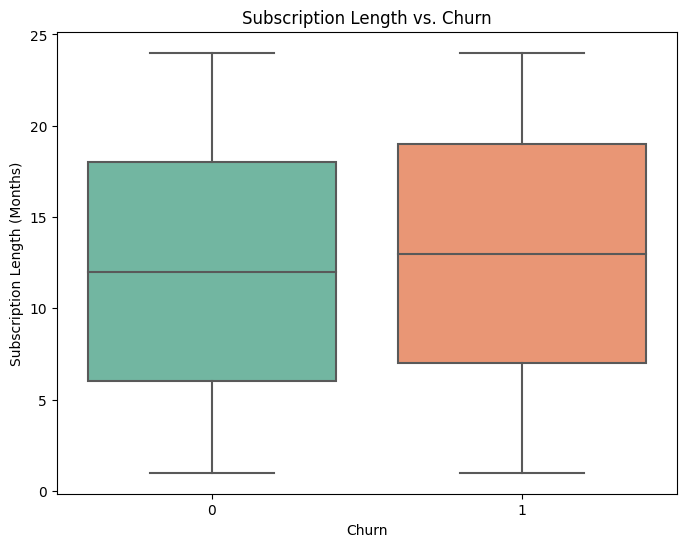

In [38]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=customer_data, x='Churn', y='Subscription_Length_Months',palette='Set2')
plt.xlabel('Churn')
plt.ylabel('Subscription Length (Months)')
plt.title('Subscription Length vs. Churn')
plt.show()

Now, we'll generate a heatmap to uncover correlations between numerical features.

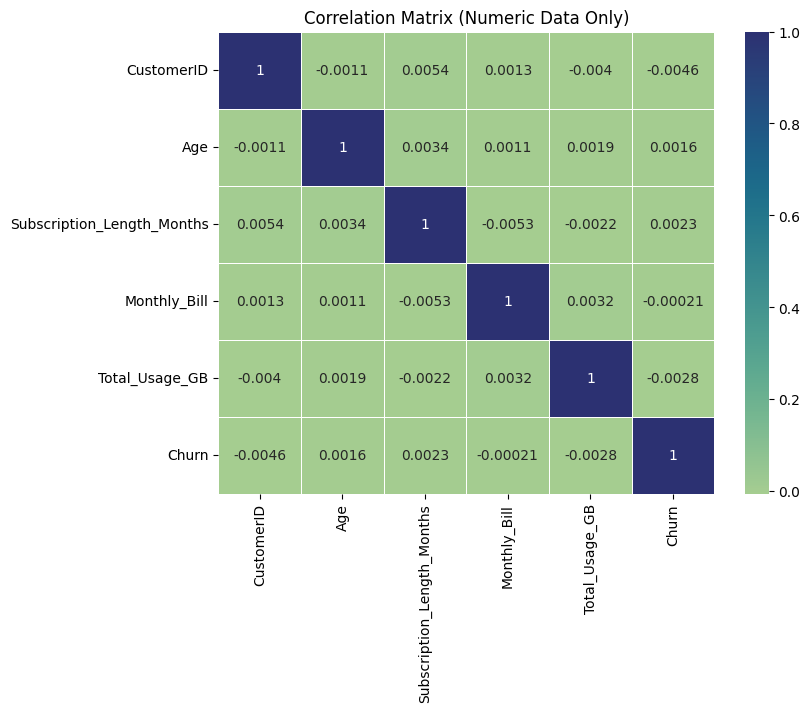

In [39]:
numeric_columns = customer_data.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="crest", linewidth=.5)
plt.title('Correlation Matrix (Numeric Data Only)')
plt.show()

Here we don't see any special correlation among the parameters

# Feature Engineering

I'll exclude 'Name' and 'CustomerID' columns from the dataset since they are not relevant for model building.

In [40]:
customer_data.drop(['CustomerID','Name'],inplace=True,axis=1)

In [41]:
customer_data.columns

Index(['Age', 'Gender', 'Location', 'Subscription_Length_Months',
       'Monthly_Bill', 'Total_Usage_GB', 'Churn'],
      dtype='object')

In [42]:
categorical_columns = ['Gender','Location']
numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

One-hot encoding (OHE) converts categorical variables into binary vectors.

In [43]:
ohe = OneHotEncoder(drop='first', sparse_output=False)
ohe_encoded = ohe.fit_transform(customer_data[categorical_columns])
ohe_column_names = ohe.get_feature_names_out(input_features=categorical_columns)

Min-Max scaling transforms numerical features to a common range

In [44]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(customer_data[numerical_columns])

In [45]:
df_combined = pd.DataFrame(
    data=np.concatenate((ohe_encoded, scaled_data, customer_data[['Churn']].values), axis=1),
    columns=list(ohe_column_names) + numerical_columns + ['Churn']
)

In [46]:
df_combined.head()

,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,0.0,1.0,0.0,0.0,0.865385,0.695652,0.619429,0.413333,0.0
1,0.0,0.0,0.0,0.0,1.0,0.846154,0.000000,0.268000,0.271111,0.0
2,0.0,0.0,1.0,0.0,0.0,0.115385,0.173913,0.792429,0.911111,0.0
3,0.0,0.0,0.0,1.0,0.0,0.346154,0.086957,0.970571,0.548889,1.0
4,0.0,0.0,0.0,1.0,0.0,0.538462,0.782609,0.402000,0.480000,0.0


In [47]:
df_combined.shape

(100000, 10)

In [48]:
df_combined.columns

Index(['Gender_Male', 'Location_Houston', 'Location_Los Angeles',
       'Location_Miami', 'Location_New York', 'Age',
       'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB',
       'Churn'],
      dtype='object')

# Model Selection

In [49]:
sample_fraction = 0.4
sample_data = df_combined.sample(frac=sample_fraction, random_state=42)

The reason for using a sample fraction of 0.4 and creating a subsample (`sample_data`) with a random seed of 42 is to reduce the dataset size for faster experimentation and model development, while still maintaining a representative portion of the original data for analysis and training.

In [50]:
sample_data.head(10)

,Gender_Male,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
75721,0.0,1.0,0.0,0.0,0.0,0.576923,0.434783,0.835429,0.982222,0.0
80184,1.0,0.0,0.0,0.0,1.0,0.596154,0.521739,0.151571,0.828889,0.0
19864,0.0,0.0,1.0,0.0,0.0,0.250000,0.173913,0.043000,0.502222,0.0
76699,1.0,0.0,0.0,0.0,1.0,0.673077,0.130435,0.923714,0.642222,1.0
92991,0.0,0.0,1.0,0.0,0.0,0.096154,1.000000,0.745857,0.564444,0.0
76434,0.0,0.0,0.0,1.0,0.0,0.173077,0.652174,0.789429,0.222222,1.0
84004,0.0,0.0,1.0,0.0,0.0,0.115385,0.391304,0.478429,0.340000,0.0
80917,1.0,0.0,0.0,0.0,1.0,0.980769,0.478261,0.762571,0.013333,0.0
60767,1.0,0.0,0.0,1.0,0.0,0.288462,0.869565,0.140429,0.786667,0.0
50074,1.0,0.0,0.0,1.0,0.0,0.923077,0.478261,0.708143,0.764444,1.0


In [51]:
X = sample_data.drop(['Churn'],axis=1)  # Features
y = sample_data['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32000, 9)
X_test shape: (8000, 9)
y_train shape: (32000,)
y_test shape: (8000,)


<h3>Using Standard ML Algos</h3>

In [52]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

In [53]:
results = []
model_names = []

for name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results.append(cv_scores.mean())
    model_names.append(name)

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Evaluate the model on the test data
    y_pred_ml = model.predict(X_test)

    accuracy_ml = accuracy_score(y_test, y_pred_ml)
    precision_ml = precision_score(y_test, y_pred_ml)
    recall_ml = recall_score(y_test, y_pred_ml)
    f1_score_ml = f1_score(y_test, y_pred_ml)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_ml:.4f}")
    print(f"Precision: {precision_ml:.4f}")
    print(f"Recall: {recall_ml:.4f}")
    print(f"F1-Score: {f1_score_ml:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_ml))

Model: Logistic Regression
Accuracy: 0.5071
Precision: 0.5053
Recall: 0.4805
F1-Score: 0.4926

Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.53      0.52      4017
         1.0       0.51      0.48      0.49      3983

    accuracy                           0.51      8000
   macro avg       0.51      0.51      0.51      8000
weighted avg       0.51      0.51      0.51      8000

Model: Random Forest
Accuracy: 0.5025
Precision: 0.5004
Recall: 0.4720
F1-Score: 0.4858

Classification Report:
              precision    recall  f1-score   support

         0.0       0.50      0.53      0.52      4017
         1.0       0.50      0.47      0.49      3983

    accuracy                           0.50      8000
   macro avg       0.50      0.50      0.50      8000
weighted avg       0.50      0.50      0.50      8000

Model: Gradient Boosting
Accuracy: 0.5024
Precision: 0.5003
Recall: 0.4406
F1-Score: 0.4686

Classification Report:


In [54]:
best_model_idx = results.index(max(results))
best_model = models[best_model_idx][0]
best_accuracy = results[best_model_idx]

In [55]:
print("Model with the highest accuracy:", best_model)
print("Accuracy:", best_accuracy)

Model with the highest accuracy: Logistic Regression
Accuracy: 0.506


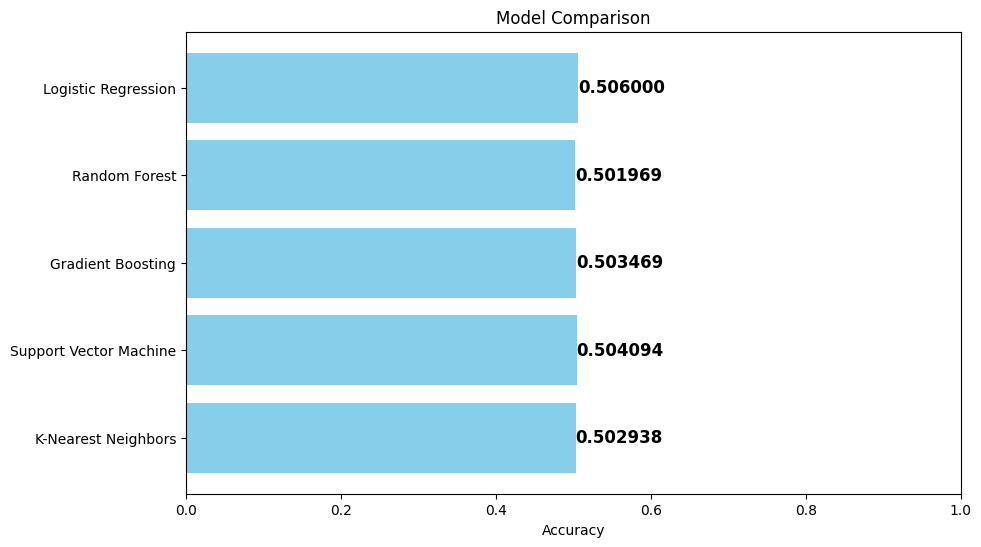

In [56]:
plt.figure(figsize=(10, 6))
plt.barh(model_names, results, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.xlim(0, 1.0)
plt.gca().invert_yaxis()

for i, v in enumerate(results):
    plt.text(v, i, f'{v:.6f}', va='center', fontsize=12, color='black', fontweight='bold')

plt.show()

The summary of the model performance indicates that the following machine learning models, when applied to the dataset, achieved similar accuracy levels of approximately 50%. Among these models, Logistic Regression slightly outperformed the others in terms of accuracy:

- Logistic Regression (max_iter=1000)
- Random Forest
- Gradient Boosting
- Support Vector Machine (SVC)
- K-Nearest Neighbors

**While all models exhibited a similar level of accuracy, Logistic Regression demonstrated a slightly higher accuracy compared to the other models.**

<h3>Using Neural Network</h3>

In [57]:
X = df_combined.drop(['Churn'],axis=1)  # Features
y = df_combined['Churn']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (80000, 9)
X_test shape: (20000, 9)
y_train shape: (80000,)
y_test shape: (20000,)


In [58]:
def lr_schedule(epoch):
    '''
    Function to adjust the learning rate during training based on the epoch number.
    '''
    if epoch < 10:
        return 0.001
    else:
        return 0.0001

In [59]:
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),

    # Hidden Layer 1
    Dense(512, activation='relu', kernel_initializer=he_normal()),
    BatchNormalization(),
    Dropout(0.5),

    # Hidden Layer 2
    Dense(256, activation='relu', kernel_initializer=he_normal()),
    BatchNormalization(),
    Dropout(0.5),

    # Hidden Layer 3
    Dense(128, activation='relu', kernel_initializer=he_normal()),
    BatchNormalization(),
    Dropout(0.5),

    # Hidden Layer 4
    Dense(64, activation='relu', kernel_initializer=he_normal()),
    BatchNormalization(),
    Dropout(0.5),

    # Output Layer
    Dense(1, activation='sigmoid')
])

The provided network architecture is a deep feedforward neural network with multiple hidden layers. It utilizes ReLU activation functions and He normal initialization for its neurons. Batch normalization layers to help stabilize training and Dropout layers are incorporated to mitigate overfitting. The network's final layer employs a sigmoid activation function for binary classification tasks.

In [60]:
custom_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
history = model.fit(
    X_train,
    y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, lr_scheduler],
    verbose=2
)

Epoch 1/100
2500/2500 - 20s - loss: 0.7250 - accuracy: 0.4987 - val_loss: 0.6936 - val_accuracy: 0.5002 - lr: 0.0010 - 20s/epoch - 8ms/step
Epoch 2/100
2500/2500 - 17s - loss: 0.6946 - accuracy: 0.5012 - val_loss: 0.6942 - val_accuracy: 0.5001 - lr: 0.0010 - 17s/epoch - 7ms/step
Epoch 3/100
2500/2500 - 19s - loss: 0.6947 - accuracy: 0.5015 - val_loss: 0.6937 - val_accuracy: 0.4979 - lr: 0.0010 - 19s/epoch - 8ms/step
Epoch 4/100
2500/2500 - 17s - loss: 0.6943 - accuracy: 0.5003 - val_loss: 0.6937 - val_accuracy: 0.5025 - lr: 0.0010 - 17s/epoch - 7ms/step
Epoch 5/100
2500/2500 - 17s - loss: 0.6942 - accuracy: 0.5021 - val_loss: 0.6935 - val_accuracy: 0.5074 - lr: 0.0010 - 17s/epoch - 7ms/step
Epoch 6/100
2500/2500 - 27s - loss: 0.6940 - accuracy: 0.5023 - val_loss: 0.6939 - val_accuracy: 0.4978 - lr: 0.0010 - 27s/epoch - 11ms/step
Epoch 7/100
2500/2500 - 19s - loss: 0.6940 - accuracy: 0.4987 - val_loss: 0.6938 - val_accuracy: 0.5001 - lr: 0.0010 - 19s/epoch - 8ms/step
Epoch 8/100
2500/25

In [64]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [65]:
history.history

{'loss': [0.725014328956604,
  0.6946117877960205,
  0.694707989692688,
  0.6942952275276184,
  0.6941710710525513,
  0.6940119862556458,
  0.6940484642982483,
  0.6938037276268005,
  0.6935171484947205,
  0.6934899687767029,
  0.6933546662330627,
  0.6932201385498047,
  0.6930975317955017,
  0.6932204365730286,
  0.6931090354919434,
  0.693060040473938,
  0.6930039525032043,
  0.6930645704269409,
  0.6931014060974121,
  0.6930918097496033,
  0.6930330395698547,
  0.6930212378501892],
 'accuracy': [0.4986625015735626,
  0.501212477684021,
  0.5014749765396118,
  0.5002999901771545,
  0.5020999908447266,
  0.5022500157356262,
  0.4987249970436096,
  0.5010125041007996,
  0.5049625039100647,
  0.502637505531311,
  0.5035125017166138,
  0.505649983882904,
  0.5044500231742859,
  0.5026500225067139,
  0.5055249929428101,
  0.5060750246047974,
  0.5066249966621399,
  0.5073624849319458,
  0.5050125122070312,
  0.5046499967575073,
  0.50638747215271,
  0.505887508392334],
 'val_loss': [0.693

In [66]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.5023499727249146


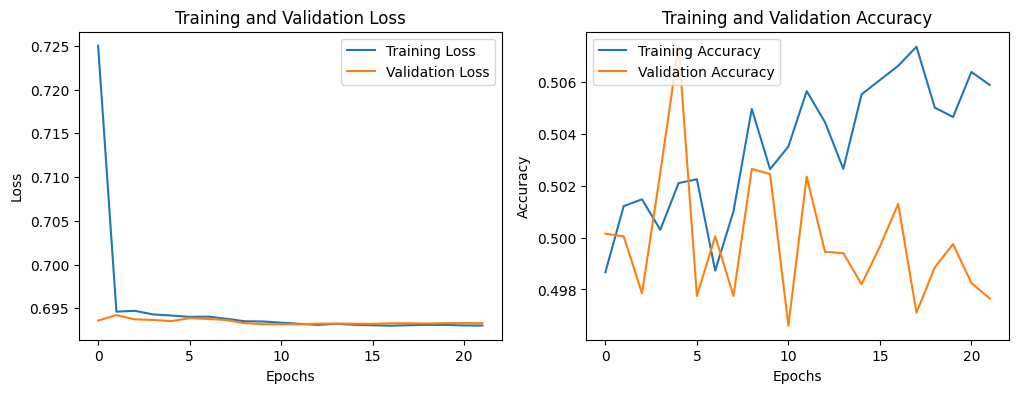

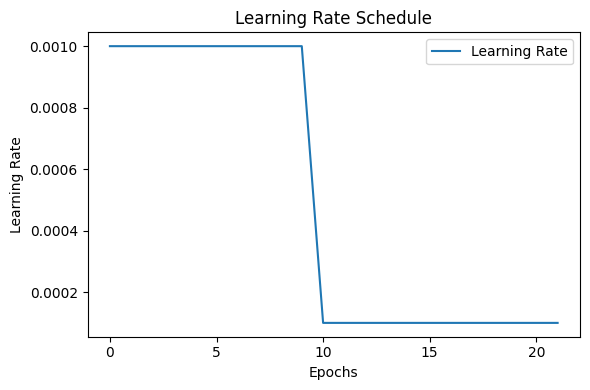

In [67]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure(figsize=(6, 4))
plt.plot(history.history['lr'], label='Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedule')
plt.legend()

plt.tight_layout()
plt.show()


In [68]:
y_pred_nn = model.predict(X_test)
y_pred_nn_binary = (y_pred_nn > 0.5).astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_nn_binary)
precision_nn = precision_score(y_test, y_pred_nn_binary)
recall_nn = recall_score(y_test, y_pred_nn_binary)
f1_score_nn = f1_score(y_test, y_pred_nn_binary)

print("Neural Network Metrics:")
print(f"Accuracy: {accuracy_nn:.4f}")
print(f"Precision: {precision_nn:.4f}")
print(f"Recall: {recall_nn:.4f}")
print(f"F1-Score: {f1_score_nn:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn_binary))


625/625 [==============================] - 2s 3ms/step
Neural Network Metrics:
Accuracy: 0.5023
Precision: 0.4983
Recall: 0.4685
F1-Score: 0.4829

Classification Report:
              precision    recall  f1-score   support

         0.0       0.51      0.54      0.52     10079
         1.0       0.50      0.47      0.48      9921

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



**In this case, the logistic regression model achieved a slightly higher accuracy of 50.6%, compared to the neural network's accuracy of 50.4%. Therefore, I will proceed to build the model using logistic regression on the complete dataset and prepare the pipeline for deployment, which you can download for future use.**